## ***House Prices Prediction***

## ***Defining the Question***

***Specifying the Question***

As a Data Scientist, I work for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, I'll create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

***Defining the Metric for Success***

To conduct the following and improve the performance of the models while using the metrics for performance as score, MSE and RMSE:



1.  Multiple Linear Regression
1.  Quantile Regression
1.  Lasso Regression
1.  Ridge Regression
2.  Elastic Net Regression

## ***Understanding the context***

There is continuous growth in demand for housing as the population increases. With this market growing, many real estate companies have been established, all bringing the housing commodity to the citizens. Housing prices are affected by many factors including, micro economic factors like customers, competitors,suppliers etc.and macro economic factors including demographic, technological, political forces etc. Housing affordability continues to be a key challenge in Kenya given the current high cost of funding and unavailability of financing, amid rising property prices. Keeping all this factors constant, this project will focus on predicting the price of houses given its physical features.

## ***Recording the Experimental Design***


1.   Read and explore the given dataset.
1.   Define the appropriateness of the available data to answer the given question.
1.   Find and deal with outliers, anomalies, and missing data within the dataset.
1.  Perform univariate, bivariate and multivariate analysis recording your observations.
2.   Performing regression analysis.
2.   Incorporate categorical independent variables into your models.Check for multicollinearity


Provide a recommendation based on your analysis. Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

Challenge your solution by providing insights on how you can make improvements in model improvement.

## ***Reading the data***

In [92]:
#Importing libraries 
import numpy as np
import pandas as pd  

pd.options.display.float_format = "{:.2f}".format

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

import seaborn as sns 

import matplotlib.pyplot as plt 

%matplotlib inline

In [93]:
#loading dataset
house_data = pd.read_csv('house_data.csv')

In [94]:
# Previewing the top and bottom part of the dataset
display("house data preview")
display(house_data.head(3))
display(house_data.tail(3))

'house data preview'

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287
21612,1523300157,325000.00,2,0.75,1020,1076,2.00,0,0,3,7,1020,0,2008,0,98144,47.59,-122.30,1020,1357


In [95]:
# Check The number of records in dataset
print('House_data dataset has ',house_data.shape[0],'records and ',house_data.shape[1], 'columns' )

House_data dataset has  21613 records and  20 columns


In [96]:
# Check  information on datatypes of datasets 
display("Information on house data")
display(house_data.info())
#Checking the columns in datasets
display("House_data columns")
display(house_data.columns)

'Information on house data'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

None

'House_data columns'

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [97]:
# A summary of the the dataset
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540182.16,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367362.23,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [98]:
# Drop the irrelevant columns 
to_drop = [ 'sqft_living15', 'sqft_lot15'] # I chose the 'sqft_living', 'sqft_lot' instead to use 
house_data.drop(to_drop, axis=1,inplace=True)

## ***Tidying the dataset***

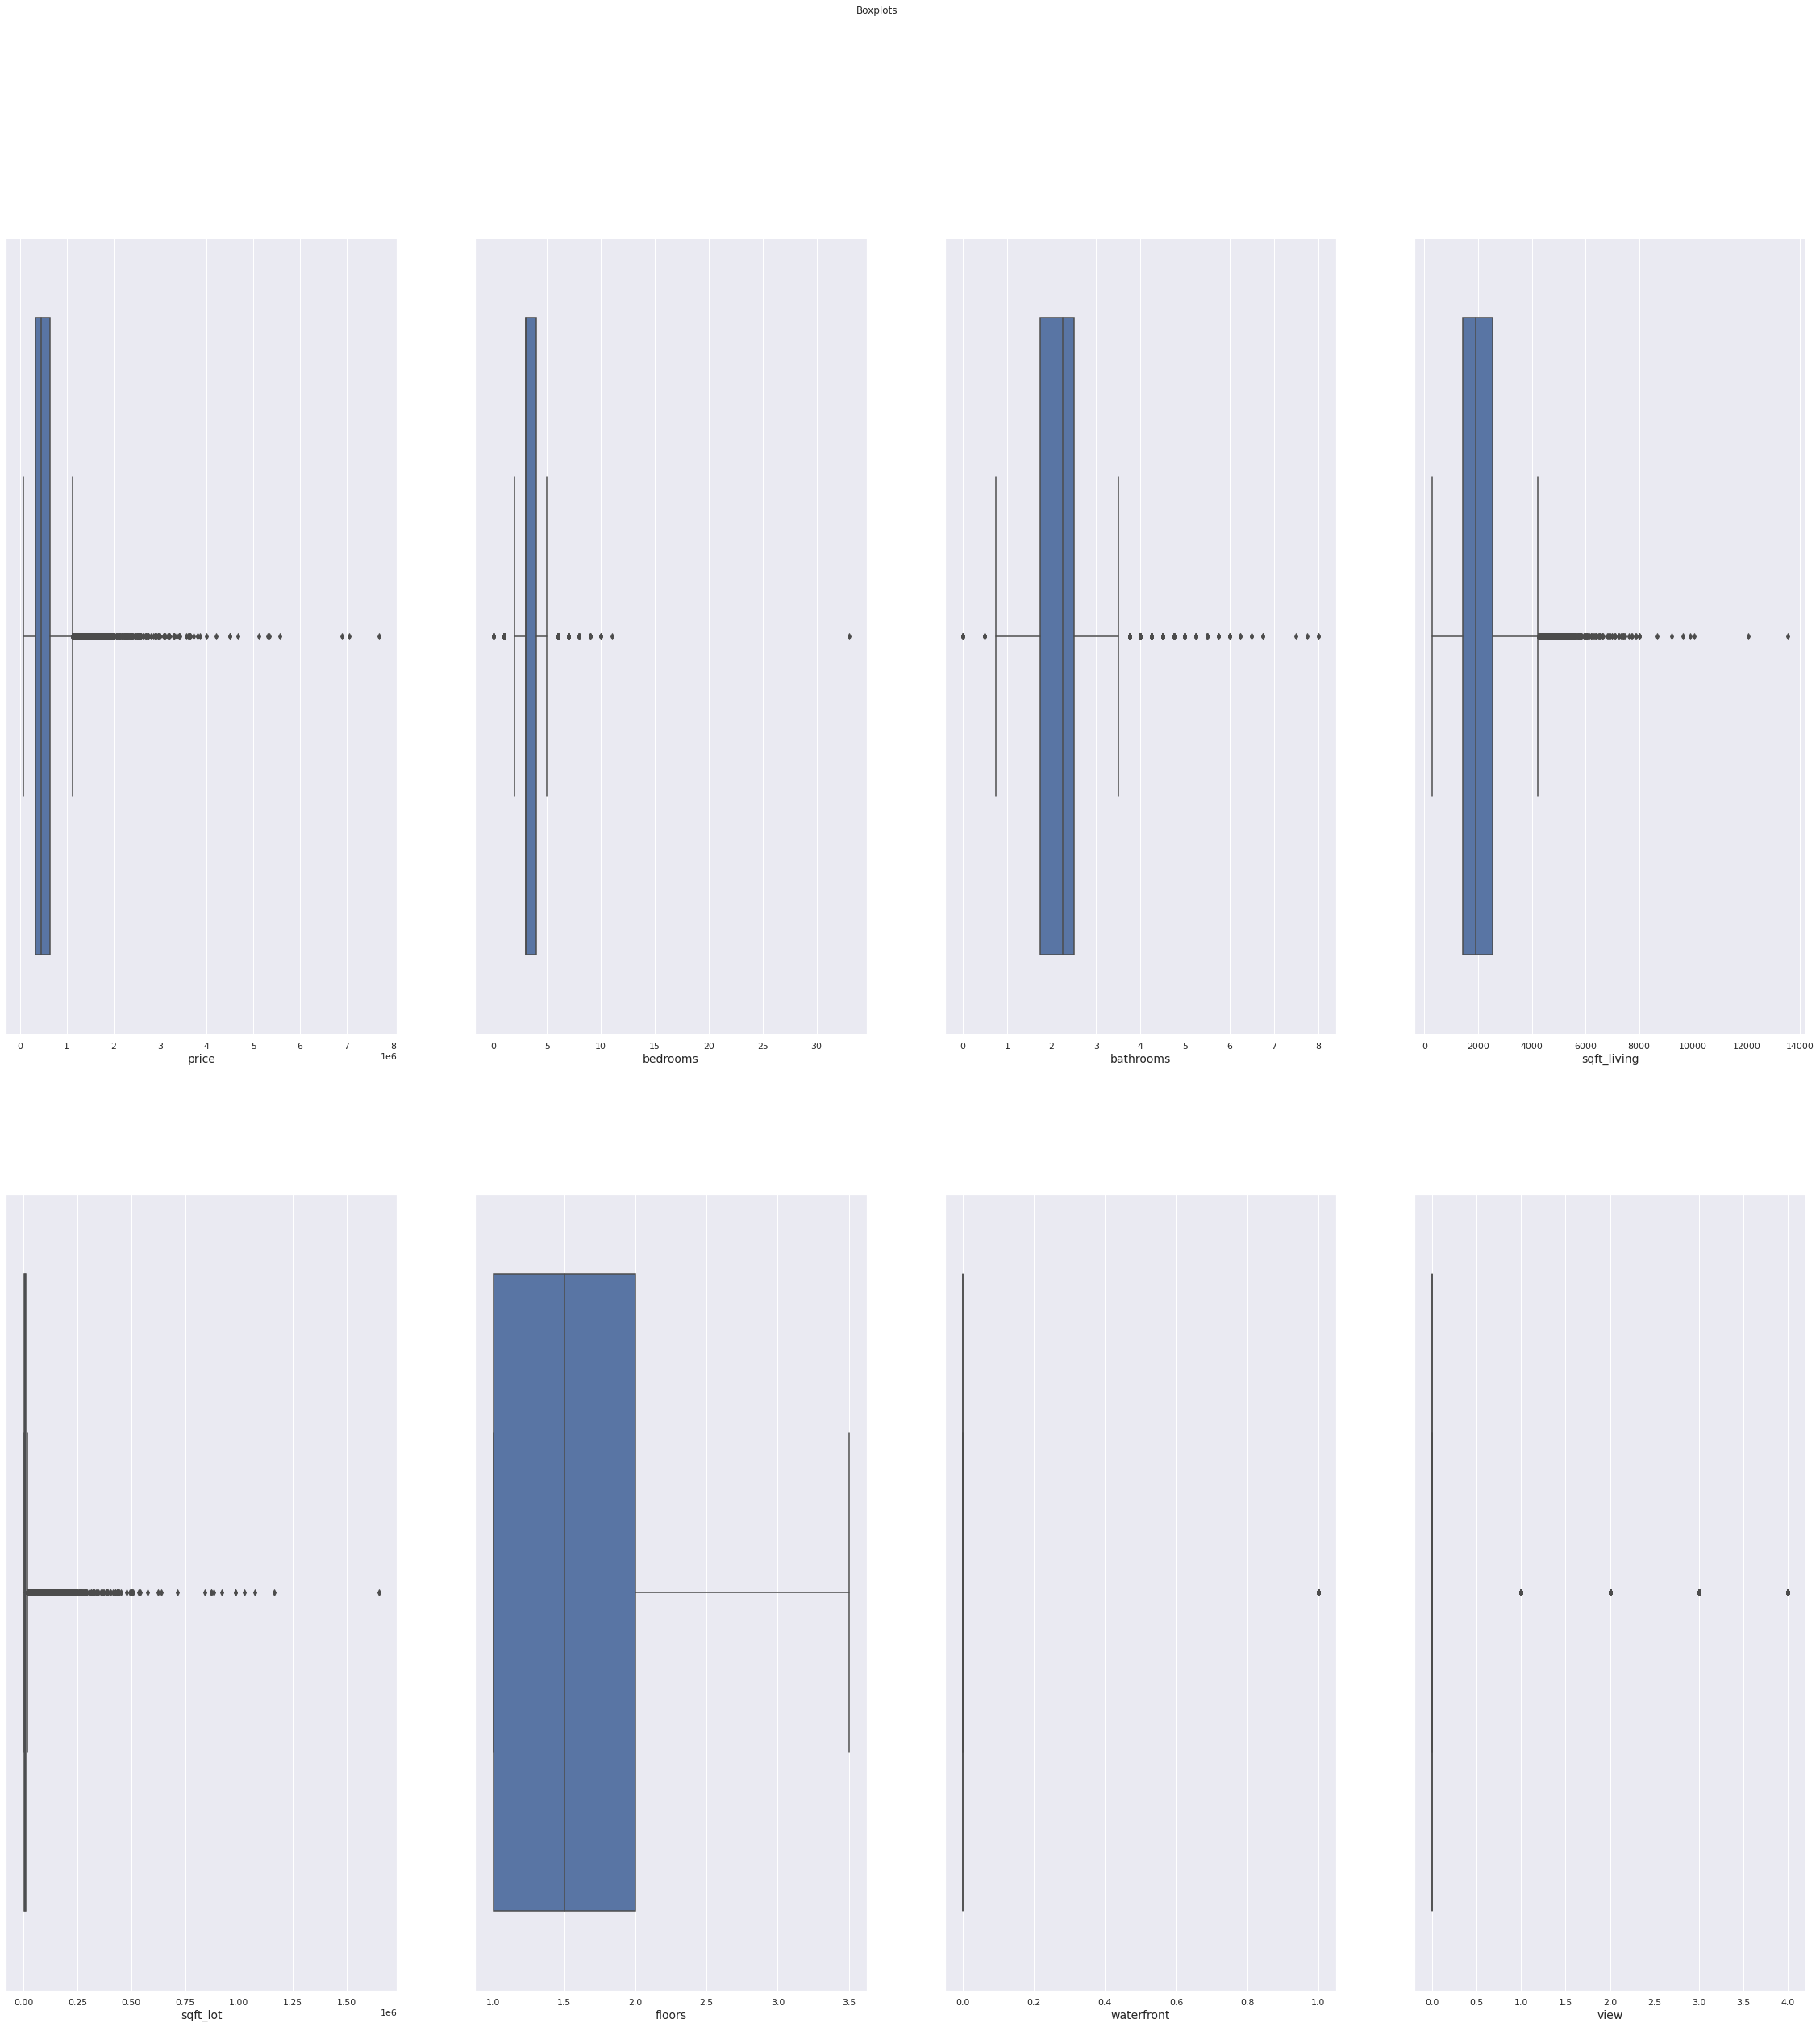

In [99]:
# Checking for Outliers
fig, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8)  ) = plt.subplots(2,4, figsize=(40, 40))
fig.suptitle('Boxplots')
ax1.set_xlabel('xlabel',fontsize=14)
ax2.set_xlabel('xlabel',fontsize=14)
ax3.set_xlabel('xlabel',fontsize=14)
ax4.set_xlabel('xlabel',fontsize=14)
ax5.set_xlabel('xlabel',fontsize=14)
ax6.set_xlabel('xlabel',fontsize=14)
ax7.set_xlabel('xlabel',fontsize=14)
ax8.set_xlabel('xlabel',fontsize=14)


sns.boxplot(house_data['price'], ax=ax1)
sns.boxplot(house_data['bedrooms'], ax=ax2)
sns.boxplot(house_data['bathrooms'], ax=ax3)
sns.boxplot(house_data['sqft_living'], ax=ax4)
sns.boxplot(house_data['sqft_lot'], ax=ax5)
sns.boxplot(house_data['floors'], ax=ax6)
sns.boxplot(house_data['waterfront'], ax=ax7)
sns.boxplot(house_data['view'], ax=ax8)

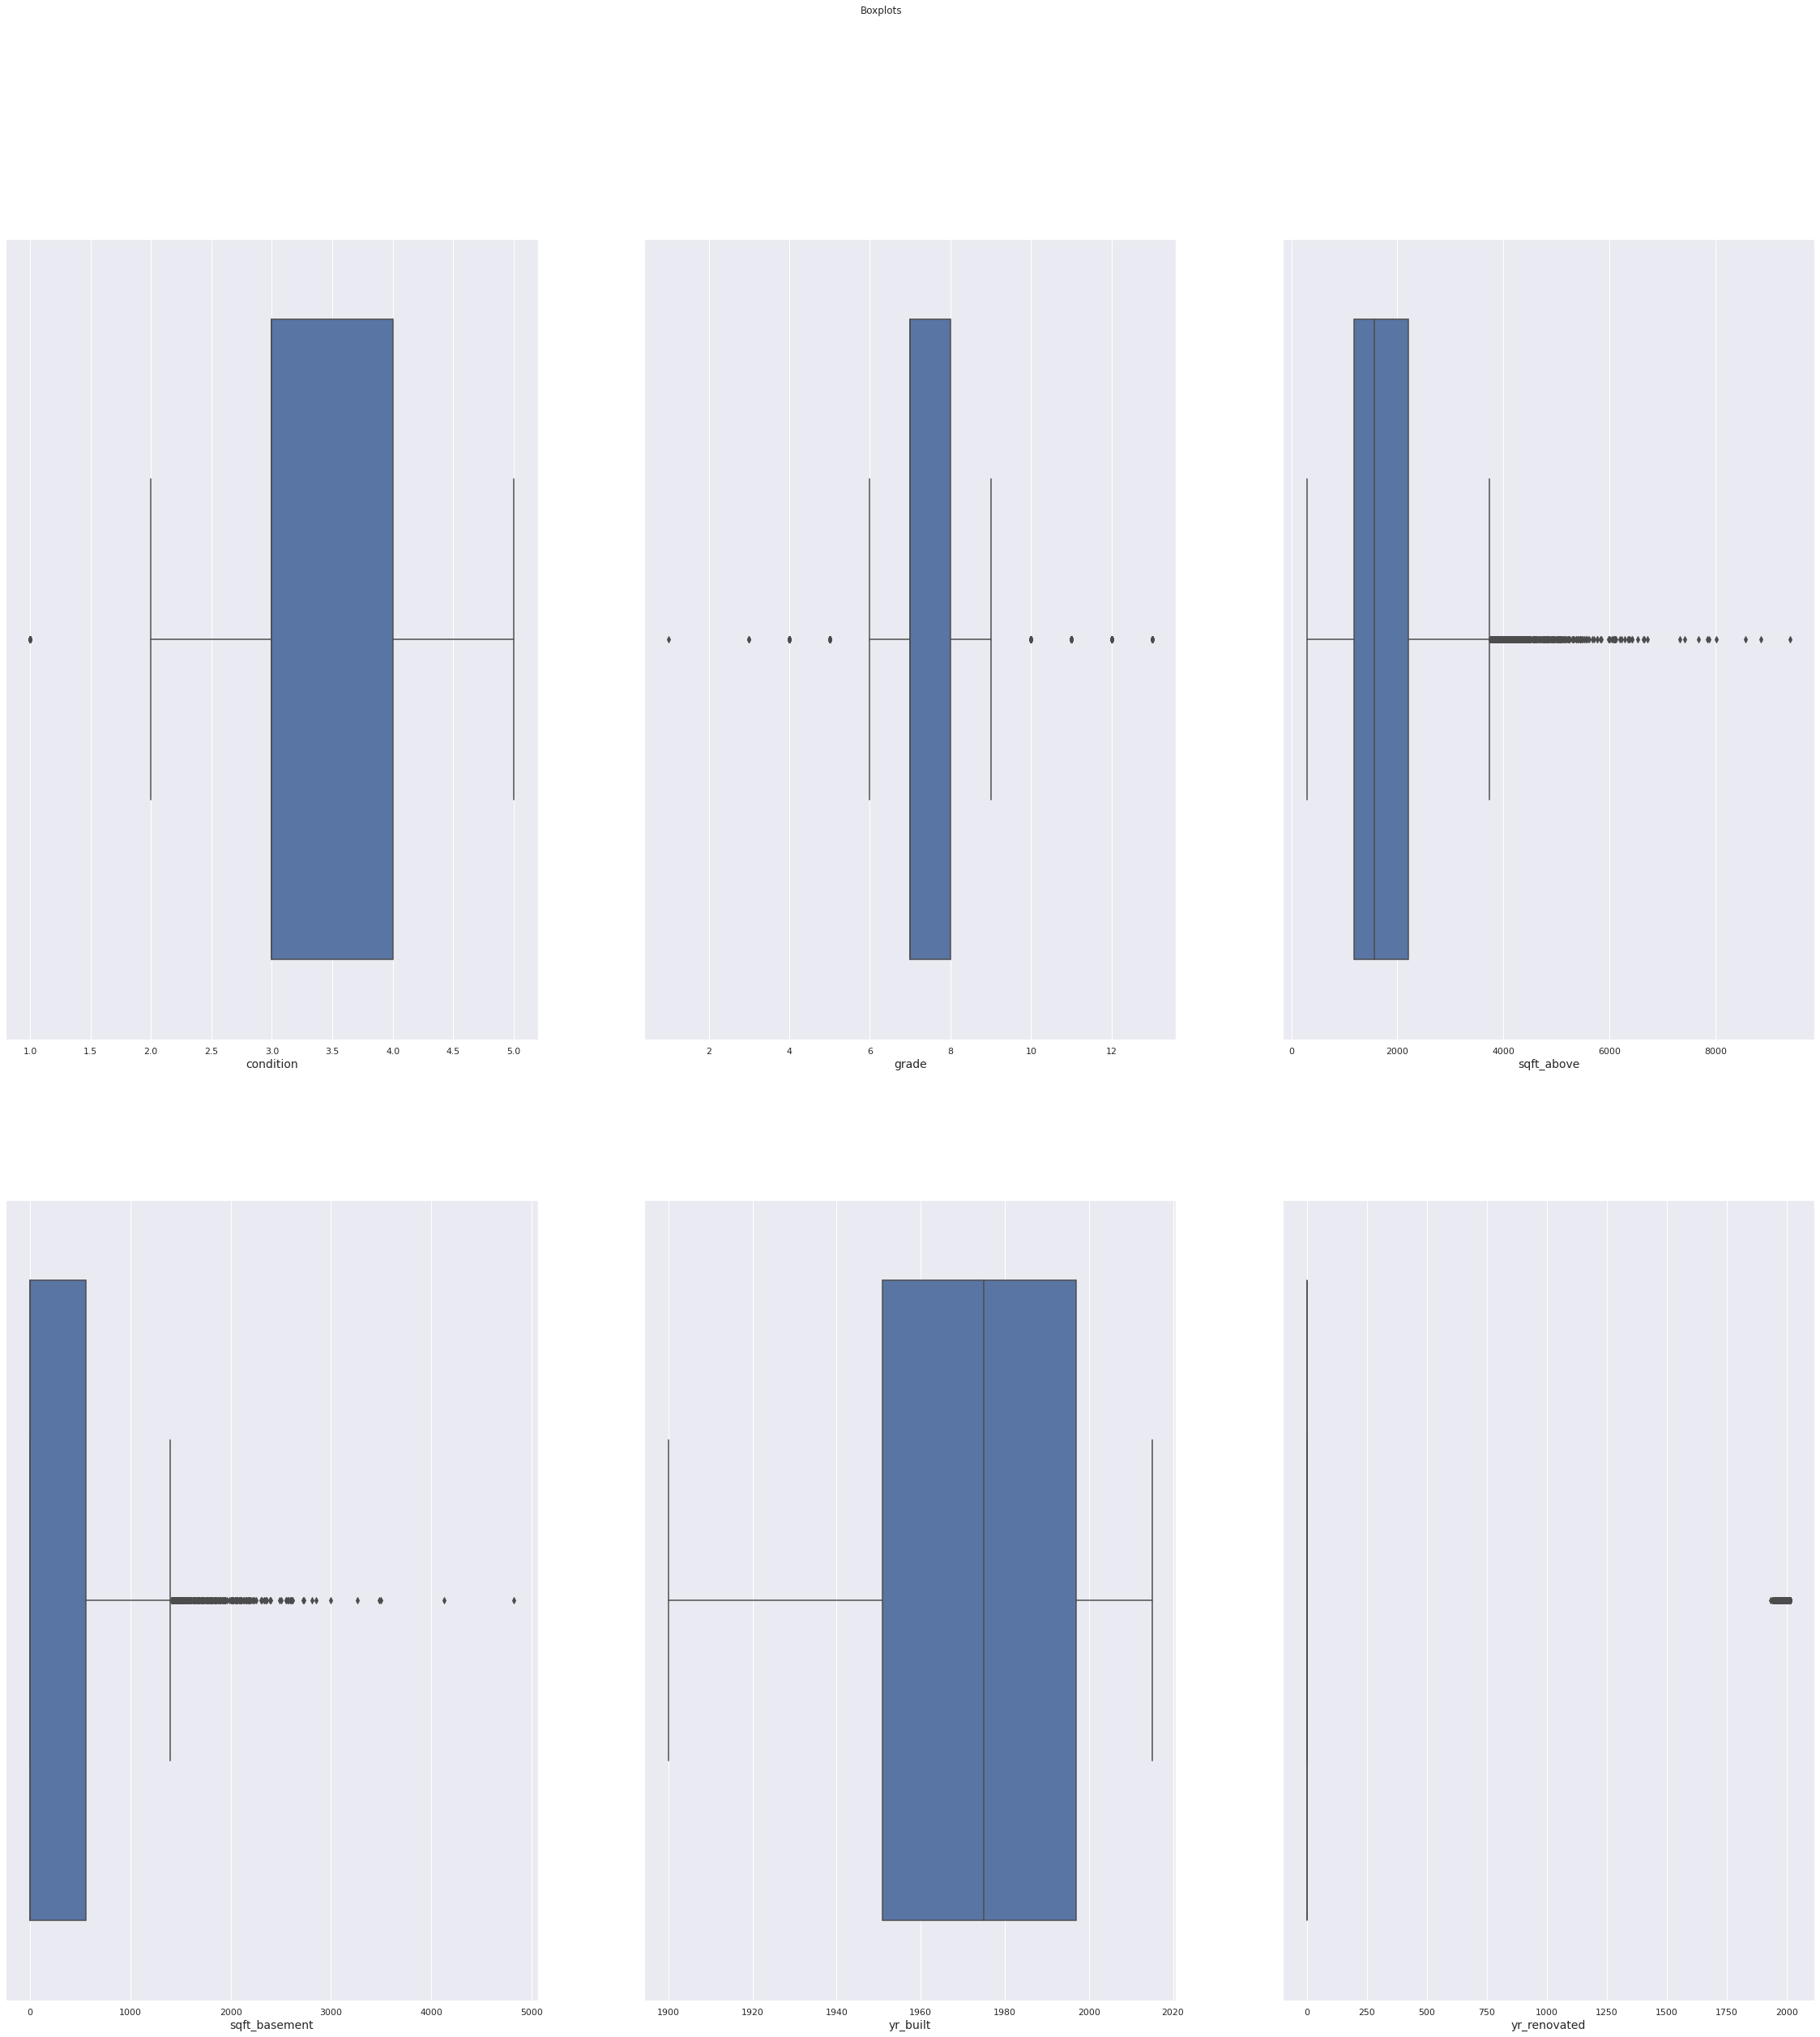

In [101]:
fig,((ax9,ax10,ax11), (ax12,ax13,ax14))= plt.subplots(2,3, figsize=(40, 40))

fig.suptitle('Boxplots')
ax9.set_xlabel('xlabel',fontsize=14)
ax10.set_xlabel('xlabel',fontsize=14)
ax11.set_xlabel('xlabel',fontsize=14)
ax12.set_xlabel('xlabel',fontsize=14)
ax13.set_xlabel('xlabel',fontsize=14)
ax14.set_xlabel('xlabel',fontsize=14)


sns.boxplot(house_data['condition'], ax=ax9)
sns.boxplot(house_data['grade'], ax=ax10)
sns.boxplot(house_data['sqft_above'], ax=ax11)
sns.boxplot(house_data['sqft_basement'], ax=ax12)
sns.boxplot(house_data['yr_built'], ax=ax13)
sns.boxplot(house_data['yr_renovated'], ax=ax14)

In [102]:
#Dealing with outliers 
Q1 = house_data.quantile(0.25)
Q3 = house_data.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
house_data_out = house_data[~((house_data < (Q1 - 1.5 * IQR)) | (house_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(house_data_out.shape)

# Printing the shape of our old dataset
# ---
#
print(house_data.shape)

(15100, 18)
(21613, 18)


In [103]:
#Checking if there any anomalies 
Q1= house_data_out.quantile(0.25)
Q3 =house_data_out.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

id              2313900597.50
price               300000.00
bedrooms                 3.00
bathrooms                1.50
sqft_living           1350.00
sqft_lot              4725.00
floors                   1.00
waterfront               0.00
view                     0.00
condition                3.00
grade                    7.00
sqft_above            1140.00
sqft_basement            0.00
yr_built              1952.00
yr_renovated             0.00
zipcode              98033.00
lat                     47.46
long                  -122.33
Name: 0.25, dtype: float64
----------------------------------------


'0.75 quartile'

id              7443000735.25
price               547500.00
bedrooms                 4.00
bathrooms                2.50
sqft_living           2210.00
sqft_lot              9000.00
floors                   2.00
waterfront               0.00
view                     0.00
condition                4.00
grade                    8.00
sqft_above            1910.00
sqft_basement          450.00
yr_built              1999.00
yr_renovated             0.00
zipcode              98118.00
lat                     47.68
long                  -122.15
Name: 0.75, dtype: float64
----------------------------------------


'0.5 quartile'

id              5129100137.75
price               247500.00
bedrooms                 1.00
bathrooms                1.00
sqft_living            860.00
sqft_lot              4275.00
floors                   1.00
waterfront               0.00
view                     0.00
condition                1.00
grade                    1.00
sqft_above             770.00
sqft_basement          450.00
yr_built                47.00
yr_renovated             0.00
zipcode                 85.00
lat                      0.23
long                     0.18
dtype: float64


In [104]:
# Checking for missing values 
display('Without outliers dataset')
display(house_data_out.isnull().sum())

'Without outliers dataset'

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

## ***Exploratory Analysis***

## ***Univariate***

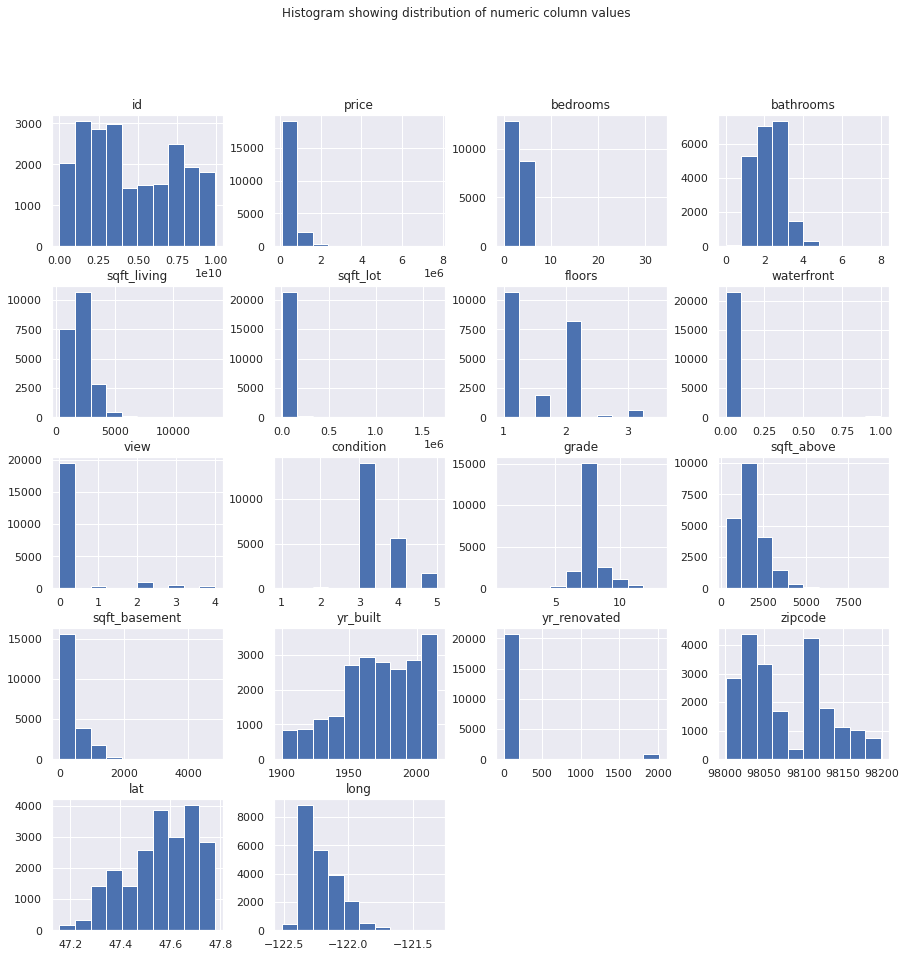

In [105]:
house_data.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram showing distribution of numeric column values")
plt.savefig('Histogram')
plt.show()

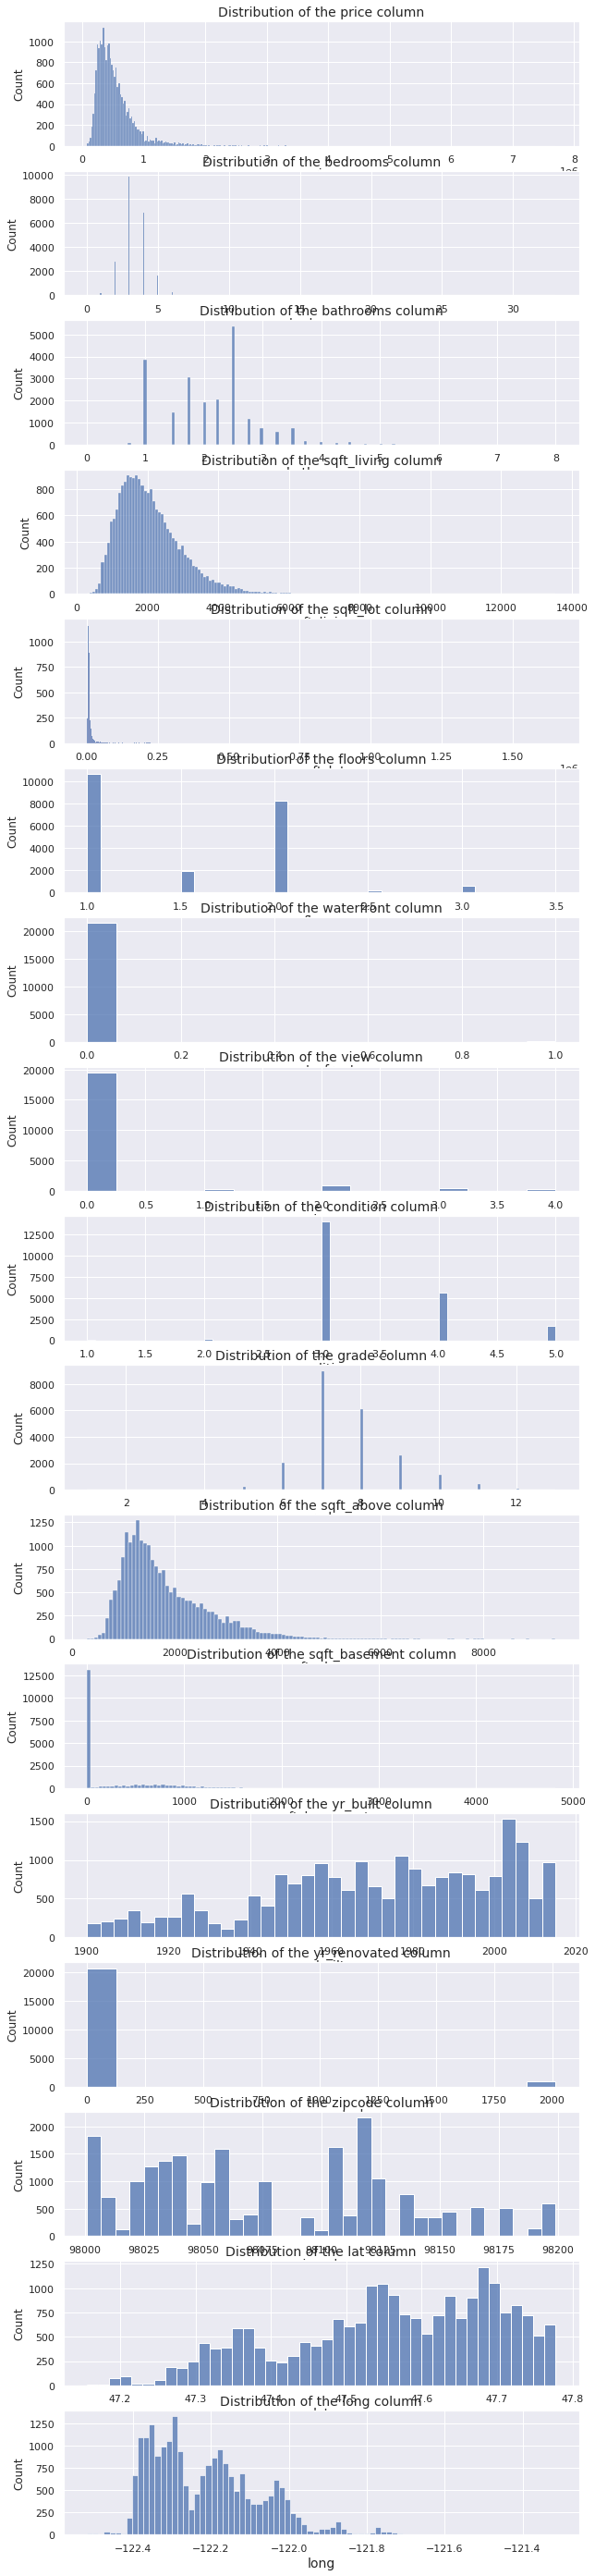

In [106]:
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       ]
fig, ax = plt.subplots(len(col_names), figsize = (10,50))
for i, col_val in enumerate(col_names):

    sns.histplot(x = house_data[col_val], ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
plt.show()

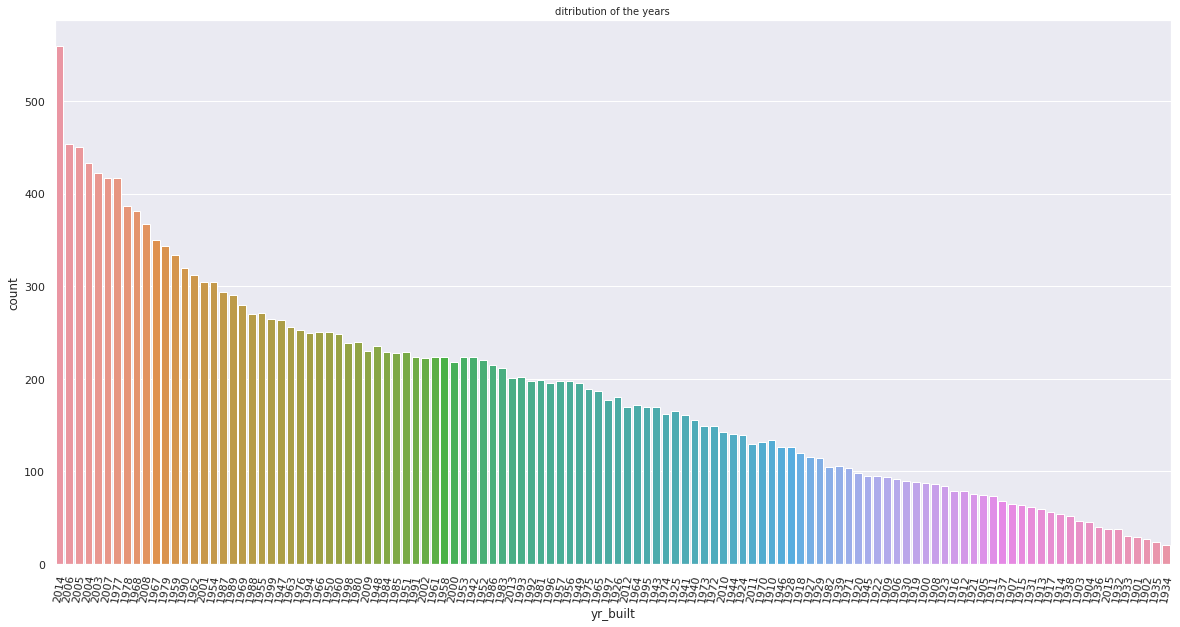

In [109]:
#Comparrison of ditribution of the years
y=sns.countplot(x='yr_built',data=house_data, order = house_data.groupby('yr_built')['yr_built'].agg('sum').sort_values(ascending=False).index)
#order=df.groupby('Genre')['Rating'].agg('mean').sort_values(ascending=False).index)
sns.set(rc={'figure.figsize':(20,10)})
plt.title('ditribution of the years', fontsize = 10)
y.set_xticklabels(y.get_xticklabels(),rotation=80)
plt.show()

Majority of the houses were constructed in 2014. The least houses were consutructed in the year 1934.

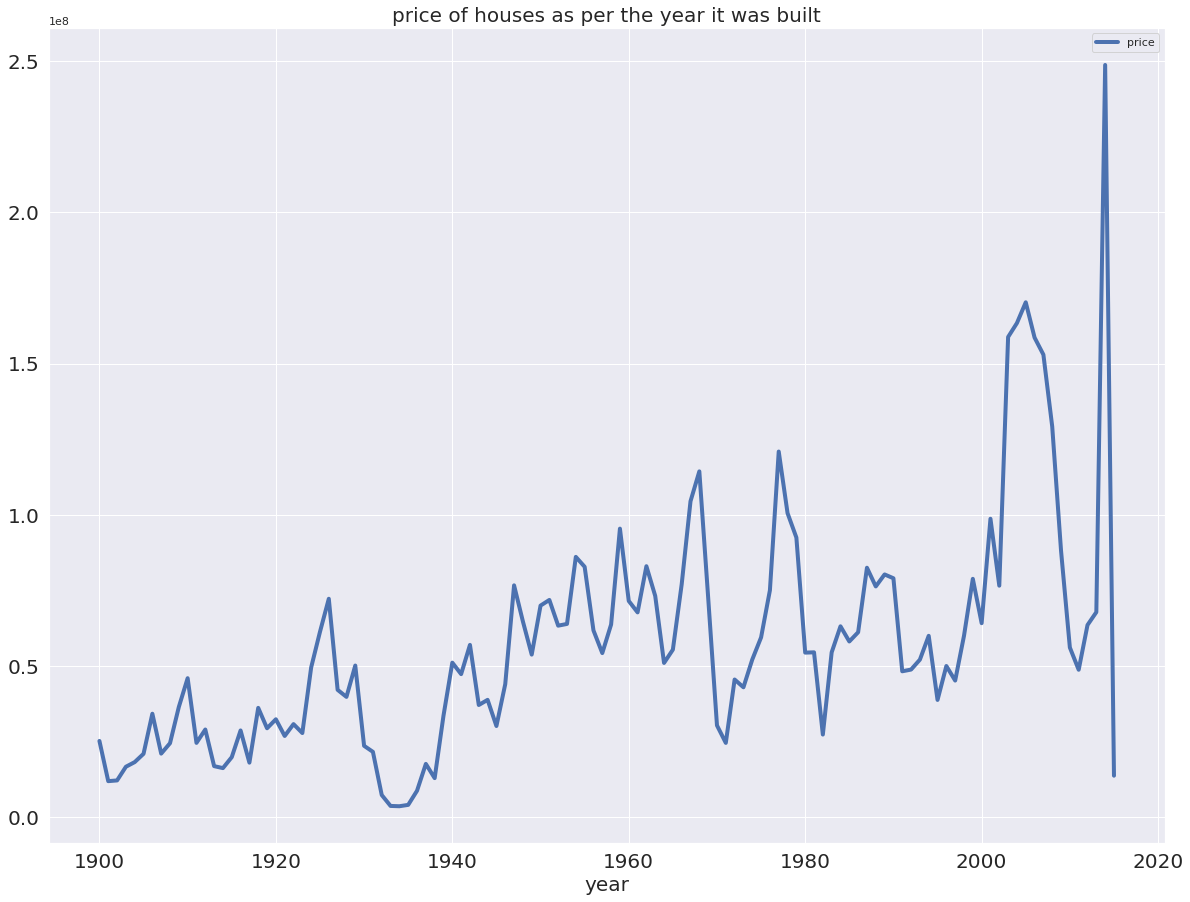

In [112]:
#See the change of prices according to the year it was built 
GB = house_data_out.groupby([house_data_out.yr_built]).sum()
GB.price.plot(figsize=(20,15), linewidth=4, fontsize=20)
plt.title('price of houses as per the year it was built', fontsize=20)
plt.xlabel('year', fontsize=20);
plt.legend()

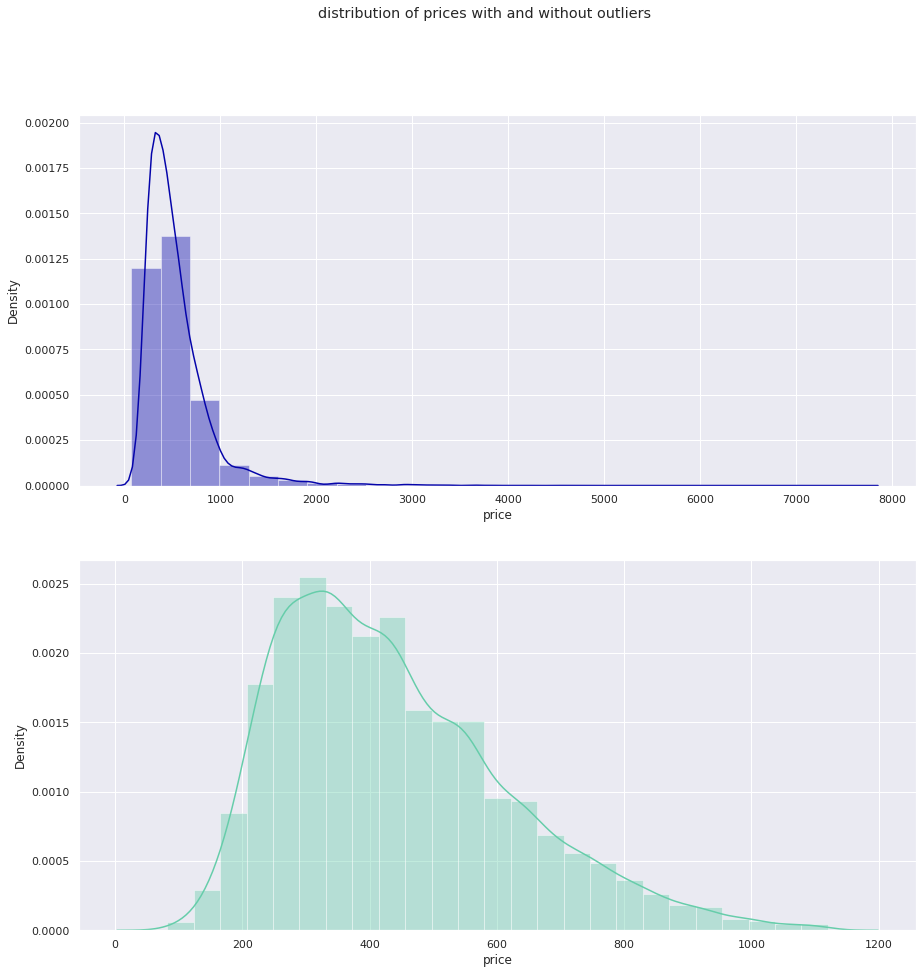

In [113]:
#Distribution of prices in 1000
fig,((ax1,ax2))= plt.subplots(2,1, figsize=(15, 15))
fig.suptitle('distribution of prices with and without outliers')
sns.distplot(house_data.price/1000, bins=25, color='#0504aa', ax=ax1)
sns.distplot(house_data_out.price/1000, bins=25, color='mediumaquamarine', ax=ax2)

## ***Bivariate***

Lets find out whether there is an effect of the independent variables on price

Our independent variables are:

1. 'bedrooms',
2. 'bathrooms',
3. 'sqft_living',
4. 'sqft_lot',
5. 'floors',
6. 'waterfront',
7. 'view',
8. 'condition',
9. 'grade',
10. 'sqft_above',
11. 'sqft_basement',
12. 'yr_built',
13. 'yr_renovated',
14. 'zipcode'

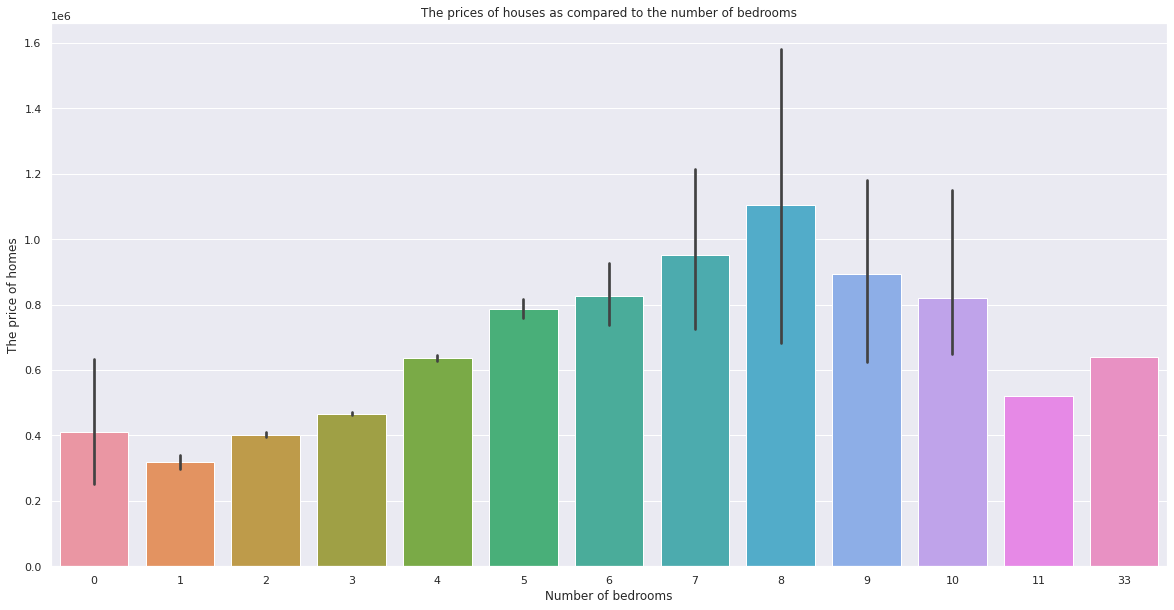

In [114]:
#Creating the dataframe with the sum of prices.
df_2 = house_data.groupby('price').sum()
df_2 = df_2.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = house_data['bedrooms'], y = house_data['price'], data=df_2)
plt.xlabel('Number of bedrooms')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of bedrooms')
plt.show()

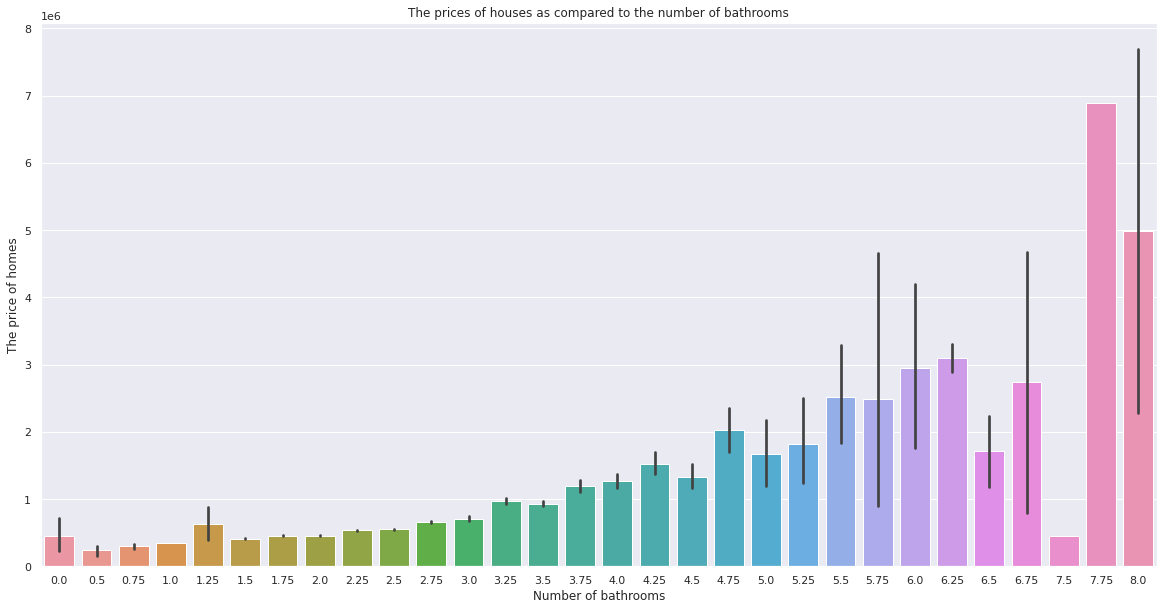

In [115]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = house_data['bathrooms'], y = house_data['price'], data=df_2)
plt.xlabel('Number of bathrooms')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of bathrooms')
plt.show()

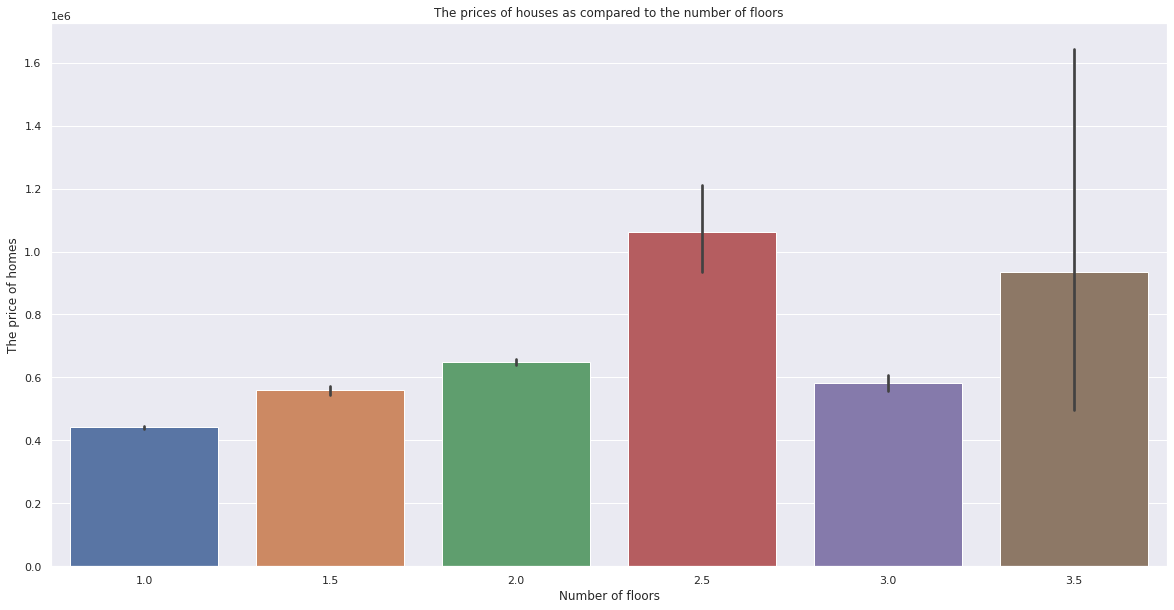

In [116]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = house_data['floors'], y = house_data['price'], data=df_2)
plt.xlabel('Number of floors')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of floors')
plt.show()

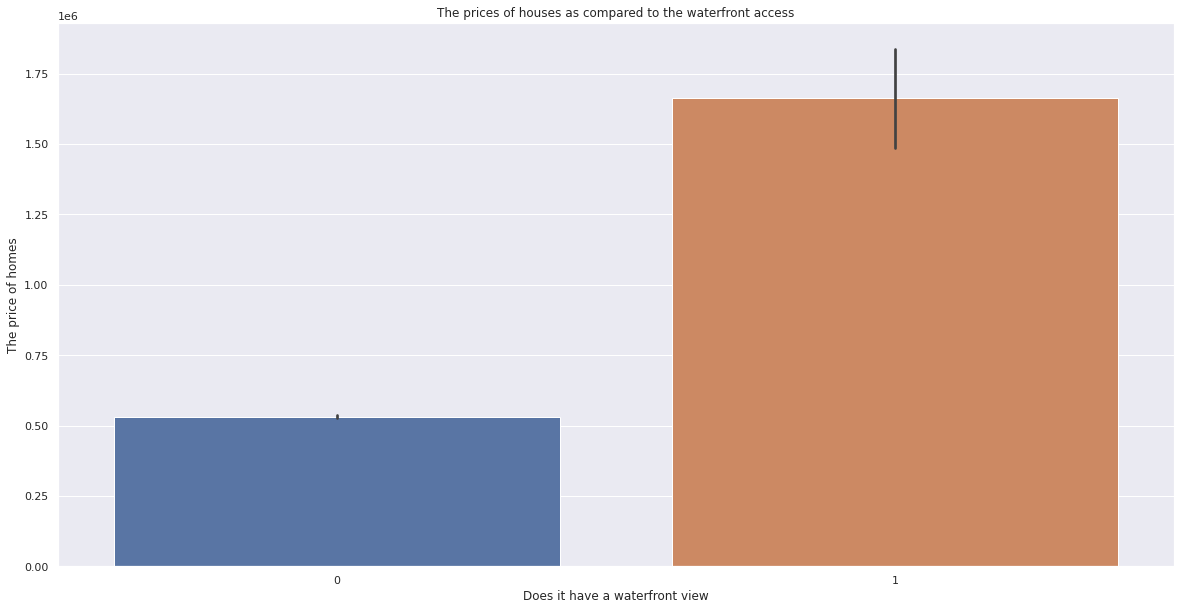

In [117]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = house_data['waterfront'], y = house_data['price'], data=df_2)
plt.xlabel('Does it have a waterfront view')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the waterfront access')
plt.show()

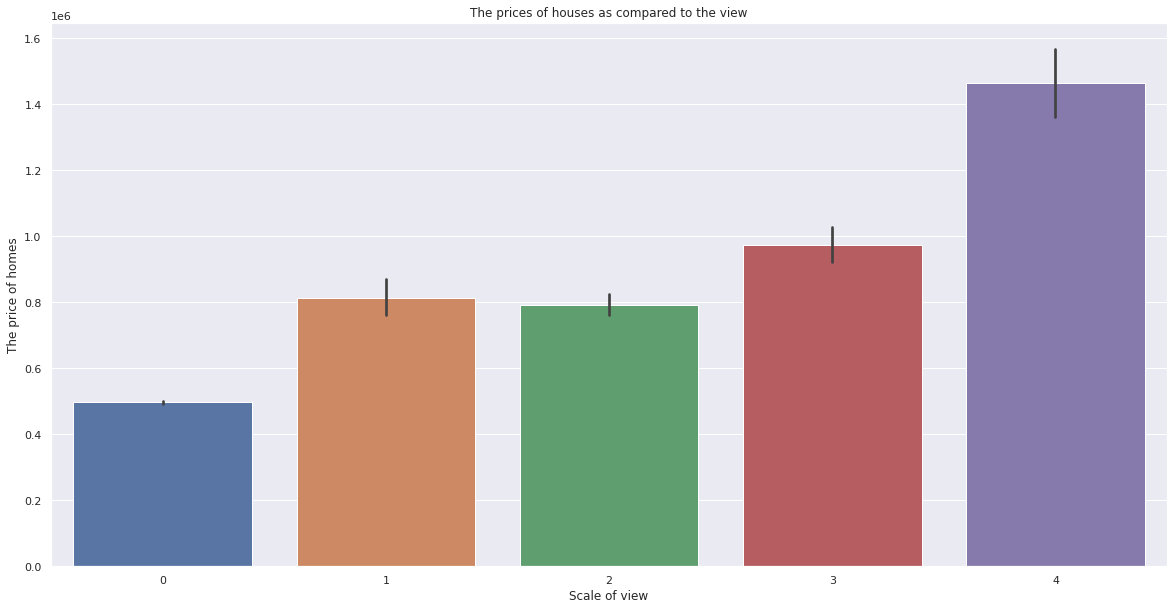

In [118]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = house_data['view'], y = house_data['price'], data=df_2)
plt.xlabel('Scale of view')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the view')
plt.show()

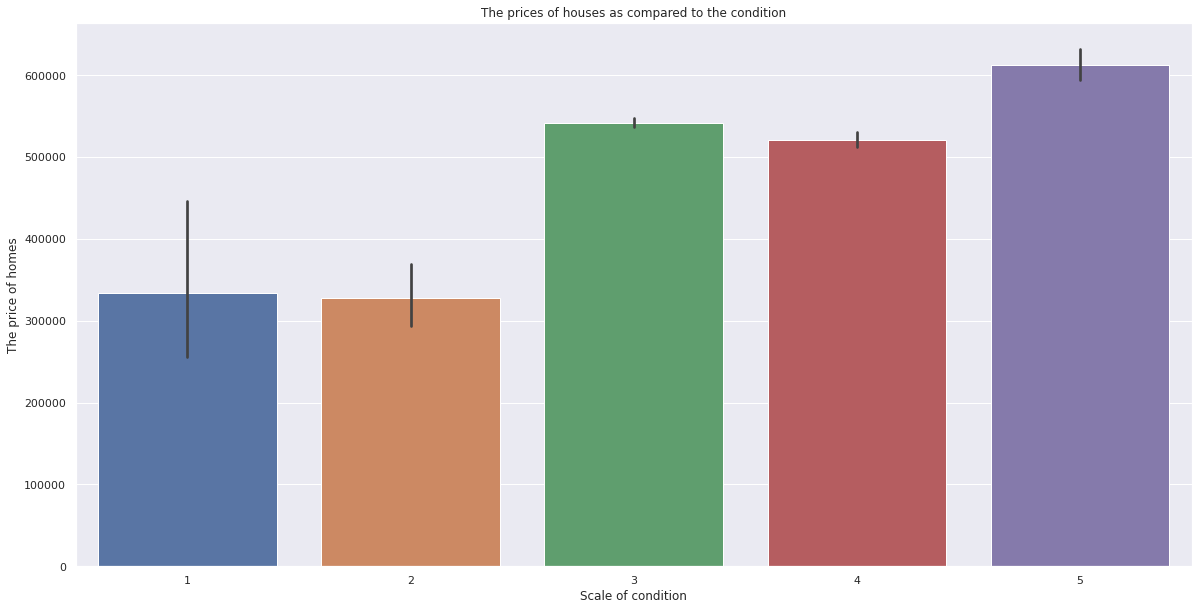

In [119]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = house_data['condition'], y = house_data['price'], data=df_2)
plt.xlabel('Scale of condition')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the condition')
plt.show()

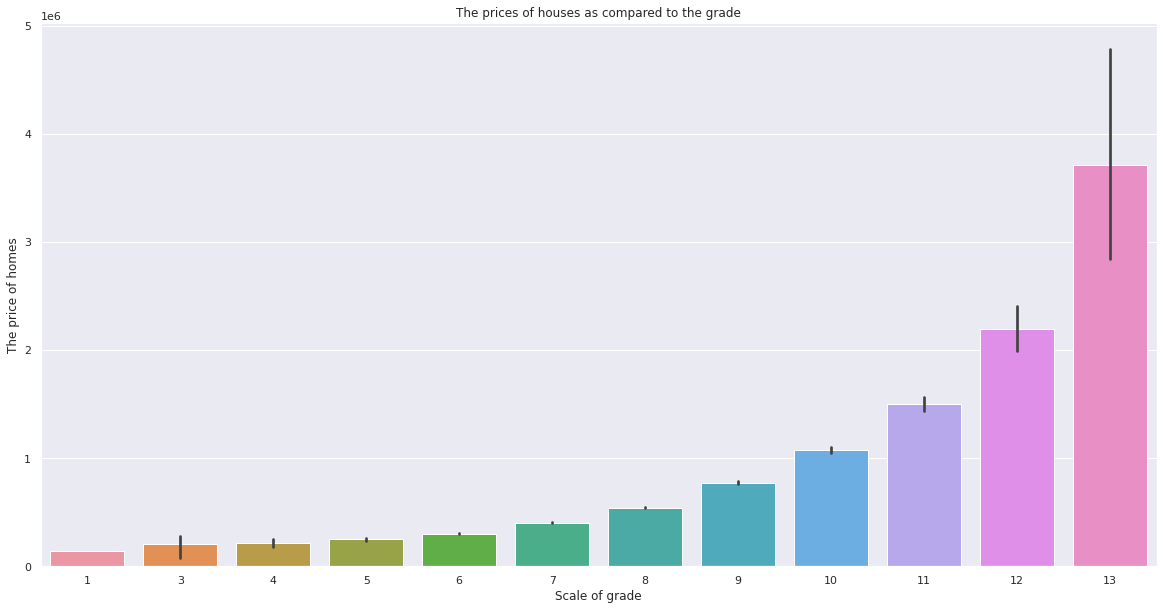

In [120]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = house_data['grade'], y = house_data['price'], data=df_2)
plt.xlabel('Scale of grade')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the grade')
plt.show()

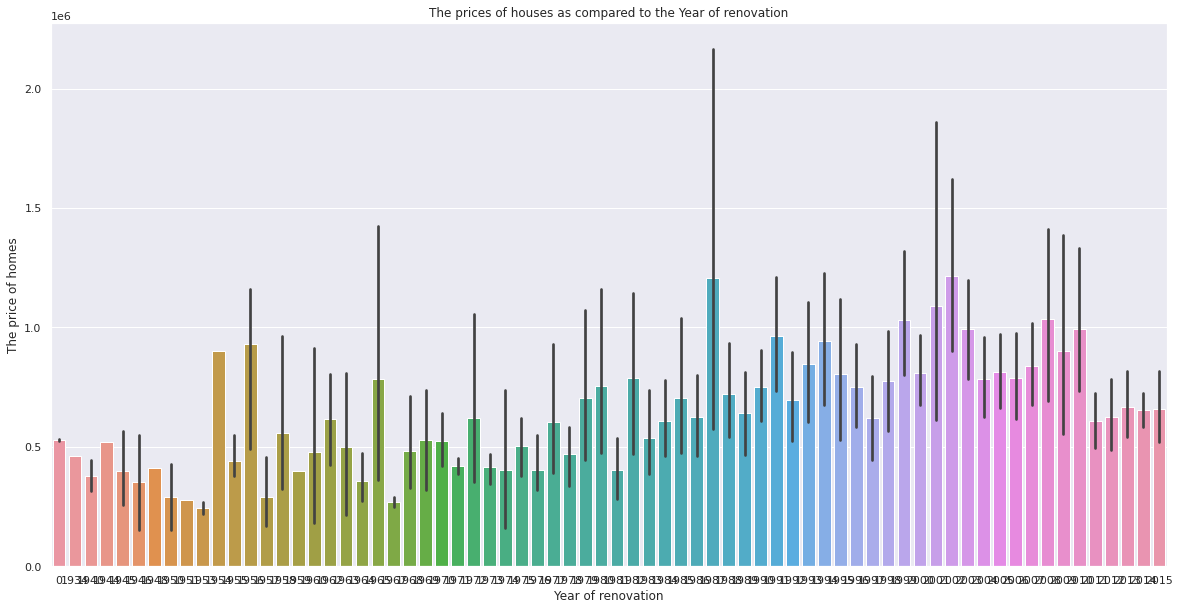

In [122]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = house_data['yr_renovated'], y = house_data['price'], data=df_2)
plt.xlabel('Year of renovation')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the Year of renovation')
plt.show()

In [123]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(house_data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

We can see that several columns have linear correlation

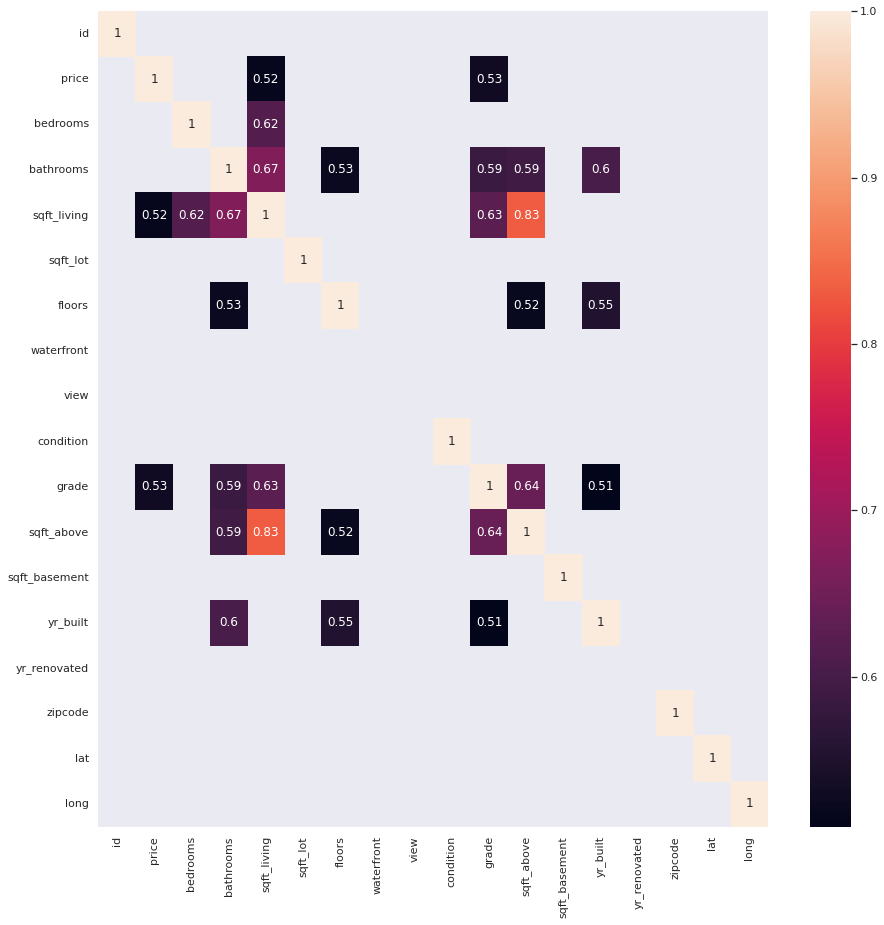

In [124]:
#correlation of each variable 
correlation_mat = house_data_out.corr()
Greaterthan= correlation_mat[correlation_mat > 0.5]
plt.show()
plt.figure(figsize=(15,15))
sns.heatmap(Greaterthan,annot=True )
plt.show()

## ***Multi-linear regression***

Multiple Linear Regression This is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. This is an extension of linear regression that uses only one explanatory variable. There are assumptions taken during a multiple linear regression which are :

1. Linearity : There must be a linear relationship between the outcome variable and the independent variables.

2. No multicollinearity : Multiple regression assumes that the independent variables are not highly correlated with each other.

3. Homoscedasticity : This assumption states that the variance of error terms are similar across the values of the independent variables.

4. Normality : For any fixed value of X,Y is normally distributed.

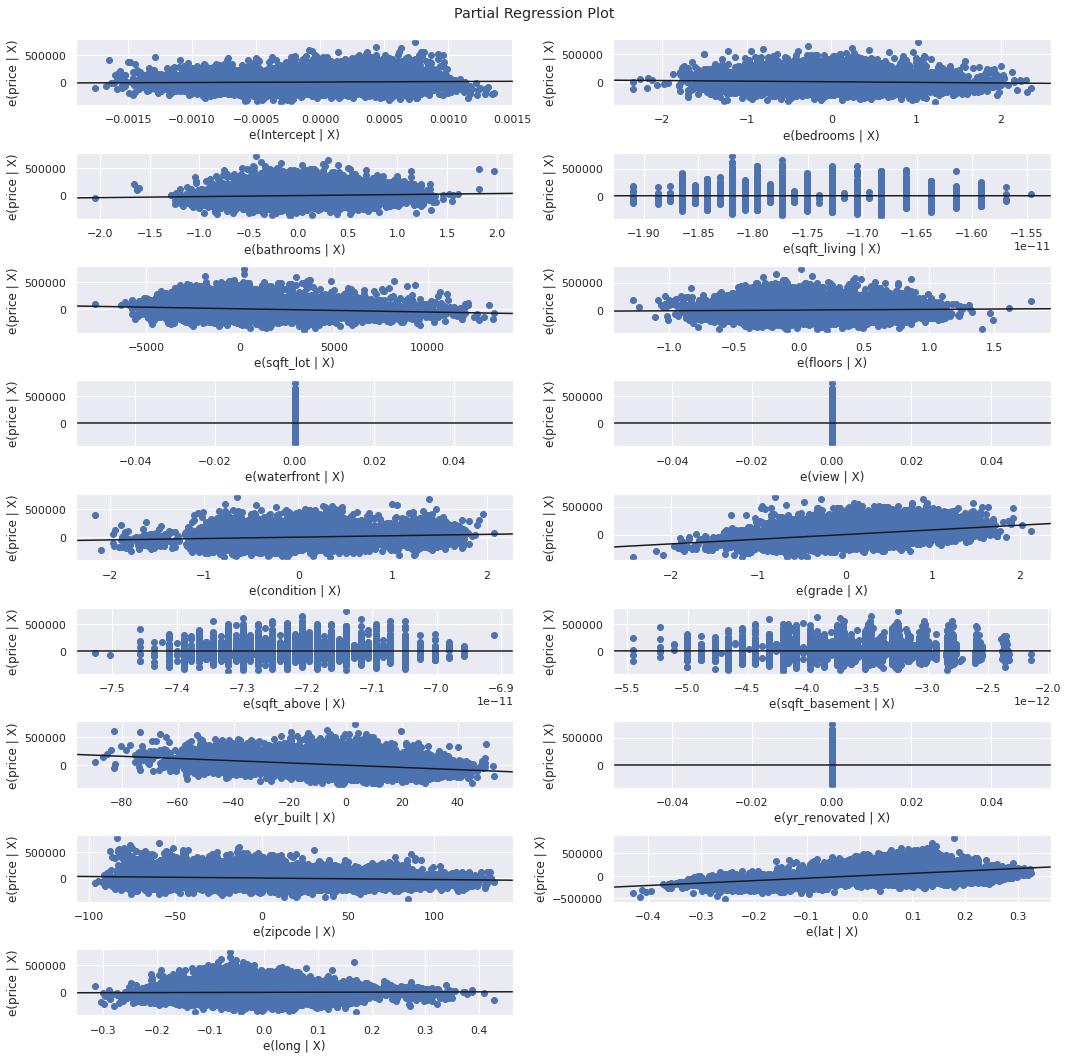

In [125]:
#Checking if the variables that had a linear relationship with price  

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig = plt.figure(figsize=(15, 15))
results = smf.ols('price ~ bedrooms +	bathrooms+	sqft_living +	sqft_lot +	floors+	waterfront +	view +condition +	grade	+sqft_above +	sqft_basement +	yr_built+	yr_renovated +	zipcode +	lat	+long ' ,
                   data=house_data_out).fit() 
plot_partregress_grid(results, fig=fig)
plt.show()

Waterfront, views and year renovated are not continous although the all variables have a linear relationship

In [126]:
#Creating a dataframe for the correlations in our dataset.
correlations = house_data.corr()
correlations

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11


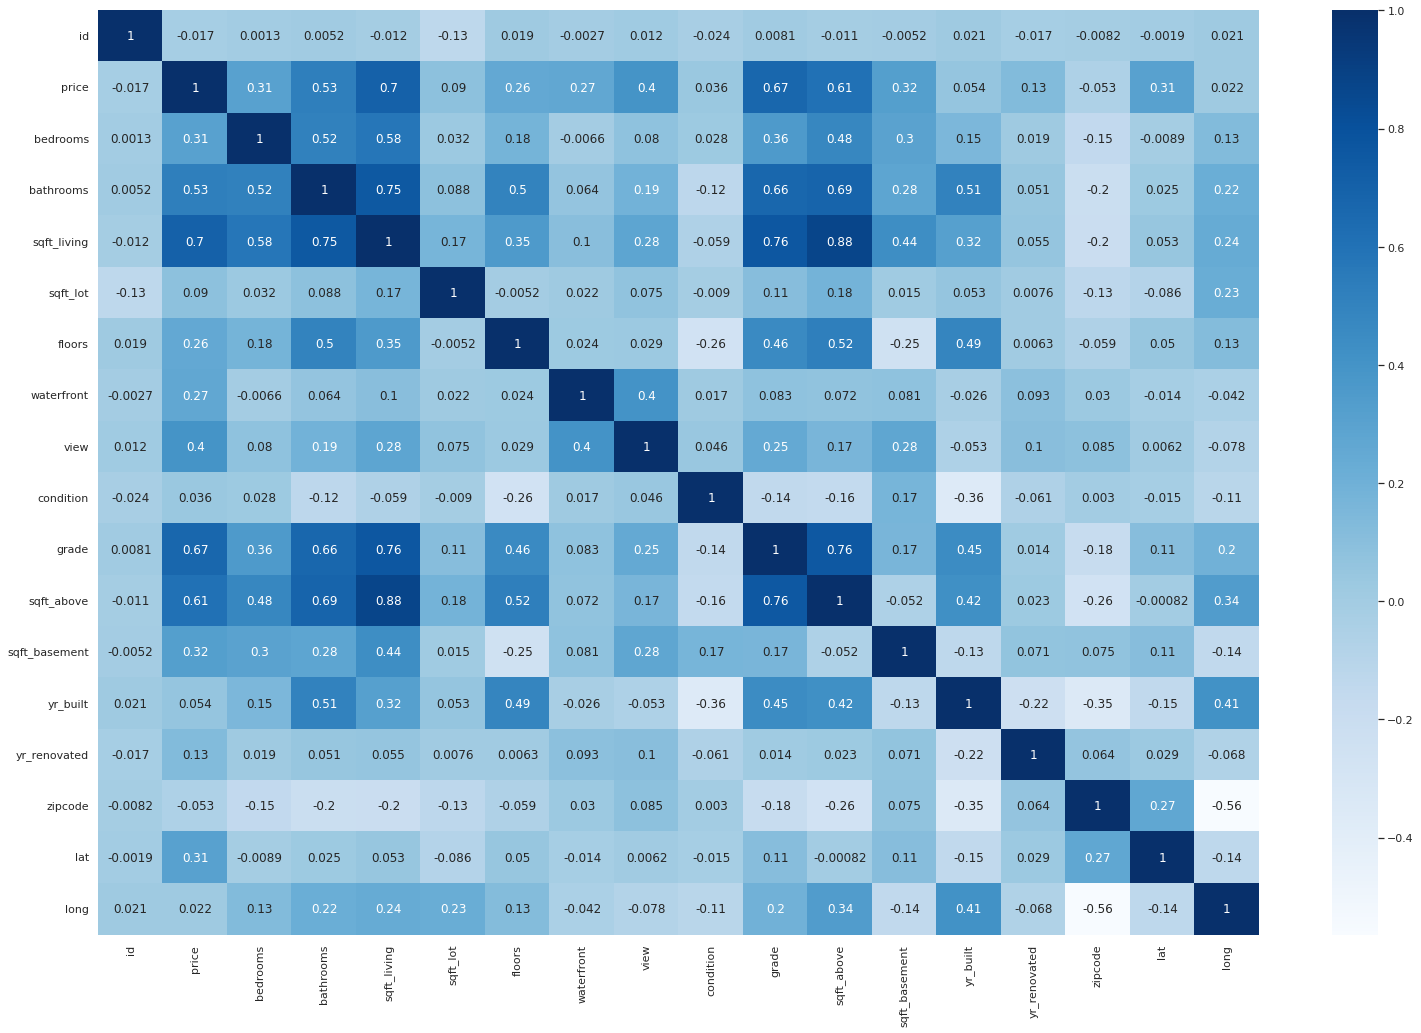

In [127]:
#A heatmap showing the correlations in our dataset 
plt.figure(figsize = (26,17))
sns.heatmap((correlations),annot=True, cmap="Blues");

In [128]:
features = house_data_out.iloc[:,[2,3,4,5.8,9,10,11,12,13,15,16,17]]
y = house_data_out.iloc[:,1]

In [129]:
#Detecting multi-colinearity 
# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = features
# Let's display the correlations between the variables
correlations = independent_only.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
bedrooms,1.00,0.45,0.62,0.20,0.03,0.29,0.49,0.24,0.16,-0.19,-0.08,0.19
bathrooms,0.45,1.00,0.67,-0.09,-0.16,0.59,0.59,0.16,0.60,-0.25,-0.05,0.30
sqft_living,0.62,0.67,1.00,0.16,-0.07,0.63,0.83,0.32,0.35,-0.24,-0.03,0.31
sqft_lot,0.20,-0.09,0.16,1.00,0.15,-0.03,0.11,0.09,-0.11,-0.26,-0.14,0.23
condition,0.03,-0.16,-0.07,0.15,1.00,-0.19,-0.19,0.20,-0.40,0.00,0.01,-0.10
grade,0.29,0.59,0.63,-0.03,-0.19,1.00,0.64,-0.00,0.51,-0.21,0.06,0.24
sqft_above,0.49,0.59,0.83,0.11,-0.19,0.64,1.00,-0.25,0.47,-0.31,-0.10,0.42
sqft_basement,0.24,0.16,0.32,0.09,0.20,-0.00,-0.25,1.00,-0.19,0.11,0.13,-0.18
yr_built,0.16,0.60,0.35,-0.11,-0.40,0.51,0.47,-0.19,1.00,-0.34,-0.19,0.43
zipcode,-0.19,-0.25,-0.24,-0.26,0.00,-0.21,-0.31,0.11,-0.34,1.00,0.30,-0.58


In [130]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
bedrooms,1.72,-0.32,-0.08,-0.16,-0.04,0.23,-0.91,-0.51,0.13,0.07,0.07,0.06
bathrooms,-0.32,2.80,1.75,0.40,-0.17,-0.27,-2.76,-1.84,-1.18,0.07,-0.04,0.03
sqft_living,-0.11,1.71,-176724780830431.00,0.57,0.16,1.37,172857486072923.22,101194669651230.31,-0.81,-0.21,-0.14,-0.15
sqft_lot,-0.16,0.40,0.57,1.28,-0.09,0.05,-0.87,-0.57,0.16,0.23,0.11,-0.23
condition,-0.04,-0.17,0.16,-0.09,1.27,-0.01,-0.02,-0.18,0.62,0.15,0.05,-0.03
grade,0.23,-0.27,1.40,0.05,-0.01,2.20,-2.66,-1.18,-0.58,0.16,-0.32,0.28
sqft_above,-0.88,-2.74,172857486072923.25,-0.87,-0.03,-2.64,-169074819903837.44,-98980211590560.00,1.12,0.08,0.23,-0.36
sqft_basement,-0.51,-1.84,101194669651230.34,-0.57,-0.18,-1.17,-98980211590560.00,-57945247506896.34,0.90,0.05,-0.01,0.13
yr_built,0.13,-1.18,-0.83,0.16,0.62,-0.58,1.13,0.91,2.53,0.17,0.33,-0.52
zipcode,0.07,0.07,-0.21,0.23,0.15,0.16,0.08,0.04,0.17,1.72,-0.33,0.81


Dealing with multi-colinearity

In [131]:
x =house_data_out.iloc[:,[2,5,9,10,12,13,15,16,17]]

In [132]:
#Detecting multi-colinearity 
# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = x
# Let's display the correlations between the variables
correlations = independent_only.corr()
correlations

,bedrooms,sqft_lot,condition,grade,sqft_basement,yr_built,zipcode,lat,long
bedrooms,1.00,0.20,0.03,0.29,0.24,0.16,-0.19,-0.08,0.19
sqft_lot,0.20,1.00,0.15,-0.03,0.09,-0.11,-0.26,-0.14,0.23
condition,0.03,0.15,1.00,-0.19,0.20,-0.40,0.00,0.01,-0.10
grade,0.29,-0.03,-0.19,1.00,-0.00,0.51,-0.21,0.06,0.24
sqft_basement,0.24,0.09,0.20,-0.00,1.00,-0.19,0.11,0.13,-0.18
yr_built,0.16,-0.11,-0.40,0.51,-0.19,1.00,-0.34,-0.19,0.43
zipcode,-0.19,-0.26,0.00,-0.21,0.11,-0.34,1.00,0.30,-0.58
lat,-0.08,-0.14,0.01,0.06,0.13,-0.19,0.30,1.00,-0.16
long,0.19,0.23,-0.10,0.24,-0.18,0.43,-0.58,-0.16,1.00


In [133]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,sqft_lot,condition,grade,sqft_basement,yr_built,zipcode,lat,long
bedrooms,1.26,-0.18,-0.04,-0.33,-0.33,-0.05,0.04,0.10,-0.12
sqft_lot,-0.18,1.22,-0.06,0.02,-0.07,0.32,0.21,0.12,-0.26
condition,-0.04,-0.06,1.26,0.01,-0.16,0.55,0.16,0.04,-0.02
grade,-0.33,0.02,0.01,1.52,-0.04,-0.76,0.12,-0.29,0.05
sqft_basement,-0.33,-0.07,-0.16,-0.04,1.20,0.11,-0.02,-0.13,0.20
yr_built,-0.05,0.32,0.55,-0.76,0.11,2.03,0.20,0.31,-0.52
zipcode,0.04,0.21,0.16,0.12,-0.02,0.20,1.72,-0.33,0.79
lat,0.10,0.12,0.04,-0.29,-0.13,0.31,-0.33,1.20,-0.14
long,-0.12,-0.26,-0.02,0.05,0.20,-0.52,0.79,-0.14,1.77


No multi-colinearity detected as the VIF are 1 and 2 only and none is heading to 5 or greater than 5

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)

In [135]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(x_train,y_train) 

In [136]:
lm.coef_

array([ 2.78773327e+04, -6.08372677e+00,  2.58227753e+04,  1.30795515e+05,
        4.29941442e+01, -1.62327648e+03, -2.24363190e+02,  5.30011713e+05,
        1.27274244e+05])

In [137]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coof= coefficients.set_axis(['Variable', 'Co-effients'], axis=1, inplace=False)
coof

,Variable,Co-effients
0,bedrooms,27877.33
1,sqft_lot,-6.08
2,condition,25822.78
3,grade,130795.51
4,sqft_basement,42.99
5,yr_built,-1623.28
6,zipcode,-224.36
7,lat,530011.71
8,long,127274.24


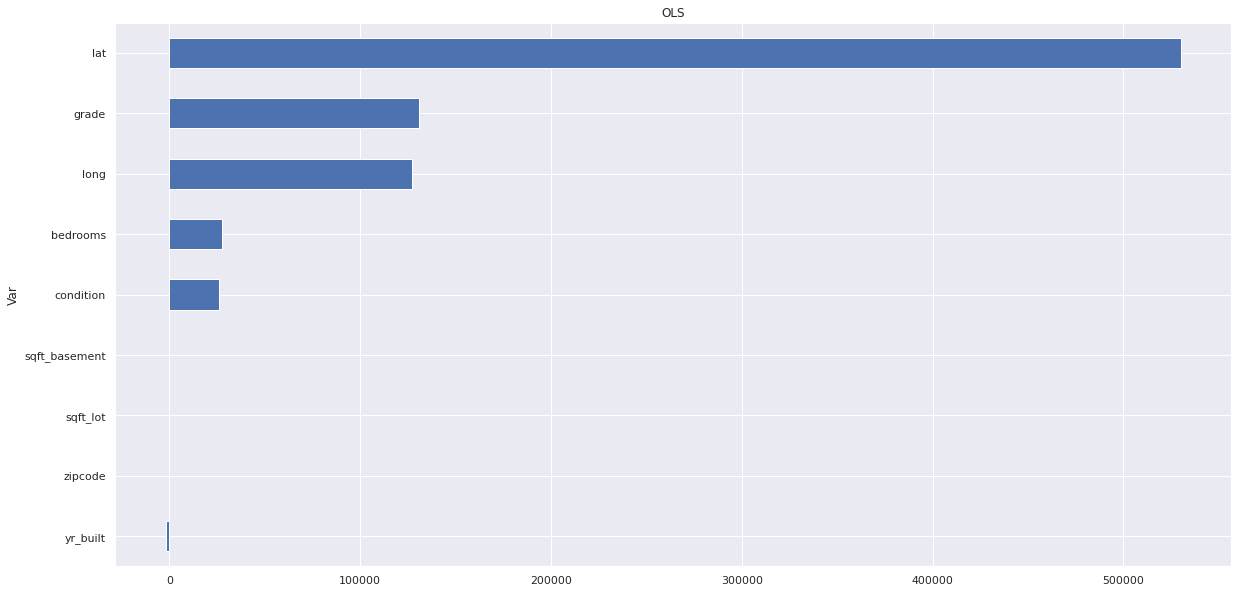

In [138]:
# Plot the coefficients in descending order
w = pd.DataFrame()
w['Var'] = x.columns
w = w.set_index('Var') # Set the variable names as the index
w['beta'] = lm.coef_

w = w.sort_values(by='beta')
w['beta'].plot.barh()
plt.title('OLS')
fig.tight_layout()
plt.show()

We can see that coefficients of latitude, grade, longitude , bedrooms and condition is much higher as compared to rest of the coefficients. Therefore the prices of the houses would be more driven by these features.

We can reduce the magnitude of coefficients in our model by carrying out different types of regression techniques which uses regularization to overcome this problem.

In [139]:
#When all the independent variables are at 0 
lm.intercept_

14883239.600983175

The price of a house is 14883239 when the other variables are at 0

In [140]:
y_pred = lm.predict(x_test)

In [141]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.565751833588223

The linear model will have a 56.57% accuracy in predicting the prices of the houses in future

In [142]:
print("The mean squared error for the linear model:",metrics.mean_squared_error(y_test, y_pred))

The mean squared error for the linear model: 13939180229.833796


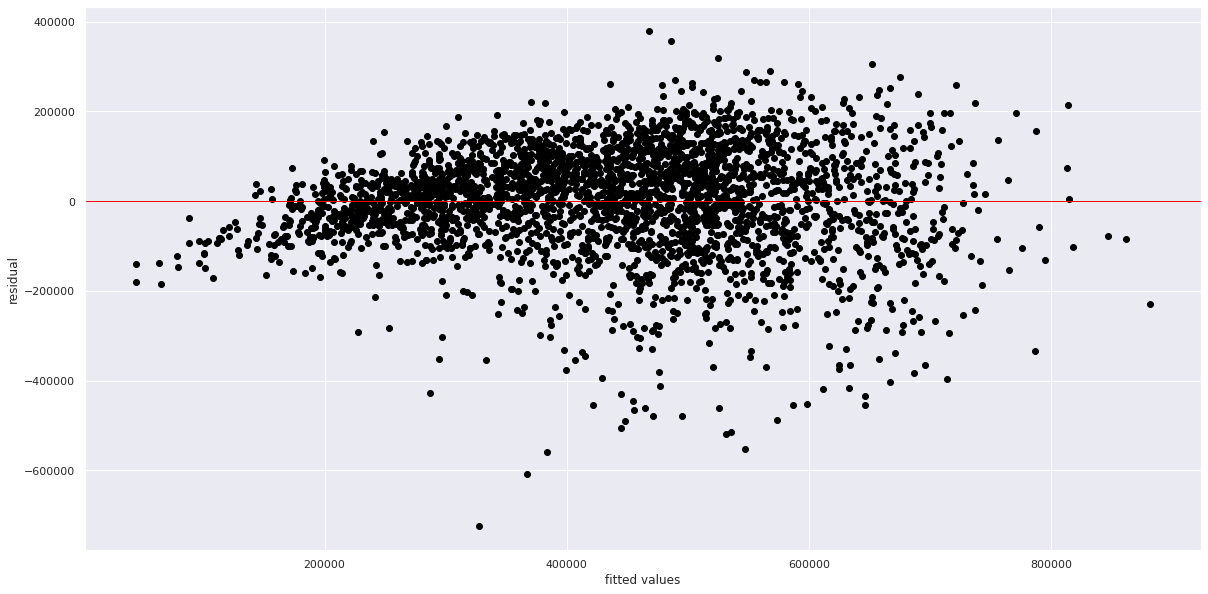

In [143]:
#residual plot 
import matplotlib.pyplot as plt
residuals = np.subtract(y_pred, y_test)
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This residual plot shows that there is no overfitting and underfitting of data And having more residuals close to 0 indicating model is fairly correct in predicting

In [144]:
#Checking for heteroskedascicity of model 
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## ***Quantile Regression***

We are trying to figure out whether the co-effecients change when we have low, medium and high prices of houses given the Principapal Components of the model

In [145]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm

In [146]:
drop=['id','price']
X = house_data.drop(drop, axis=1)
y = house_data['price']

In [147]:
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5', 'PrincComp_6' ,'PrincComp_7' , 'PrincComp_8' ,'PrincComp_9' , 'PrincComp_10'])
principalDf 

,PrincComp_1,PrincComp_2,PrincComp_3,PrincComp_4,PrincComp_5,PrincComp_6,PrincComp_7,PrincComp_8,PrincComp_9,PrincComp_10
0,-9462.59,-1054.10,-233.81,-39.27,92.65,-5.21,0.14,-0.04,-0.10,0.36
1,-7861.43,701.05,264.19,1878.44,32.64,-12.24,0.46,-1.25,0.46,-0.08
2,-5115.71,-1651.33,-163.01,-38.47,-58.60,36.00,-0.55,-0.54,0.19,0.74
3,-10109.91,-459.02,808.14,-166.11,39.72,-14.29,0.96,0.44,-0.16,-1.46
4,-7028.85,-363.97,-320.97,-42.77,-5.87,-13.50,-0.30,0.02,-0.32,0.19
...,...,...,...,...,...,...,...,...,...,...
21608,-13978.88,-537.76,-298.08,-42.02,15.65,-41.62,-0.21,0.38,-0.50,0.04
21609,-9291.10,531.77,-430.02,-45.26,71.85,-44.12,0.78,0.12,0.16,-0.10
21610,-13763.72,-1255.07,-209.39,-39.54,46.88,-54.69,-0.50,-0.62,0.27,-0.13
21611,-12721.36,-445.51,-310.63,-42.86,-57.07,-23.32,-0.35,0.27,-0.38,0.16


In [148]:
principalDf['price'] = y

In [149]:
variables= pd.DataFrame(pca.components_ ,columns=X.columns,index = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5', 'PrincComp_6' ,'PrincComp_7' , 'PrincComp_8' ,'PrincComp_9' , 'PrincComp_10'])
variables.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
PrincComp_1,0.00,0.00,0.00,1.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00
PrincComp_2,0.00,0.00,0.75,-0.01,0.00,0.00,0.00,-0.00,0.00,0.65,0.10,0.01,0.02,-0.01,0.00,0.00
PrincComp_3,0.00,0.00,0.32,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.49,0.81,-0.01,0.11,0.01,0.00,-0.00
PrincComp_4,-0.00,-0.00,-0.05,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.04,-0.09,-0.02,0.99,0.01,0.00,-0.00
PrincComp_5,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.01,-0.01,-0.16,-0.01,0.99,0.00,-0.00


In [150]:
import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ PrincComp_1 + PrincComp_2 +PrincComp_3 + PrincComp_4 +PrincComp_5 +PrincComp_6 + PrincComp_7 +PrincComp_8 + PrincComp_9 +PrincComp_10' , principalDf)

res1 = mod.fit(q=.25)
print(res1.summary())
res2 = mod.fit(q=.5)
print(res2.summary())
res3 = mod.fit(q=.75)
print(res3.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3114
Model:                       QuantReg   Bandwidth:                   2.139e+04
Method:                 Least Squares   Sparsity:                    3.960e+05
Date:                Sun, 12 Jun 2022   No. Observations:                21613
Time:                        12:01:24   Df Residuals:                    21602
                                        Df Model:                           10
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.156e+05   1166.392    356.315      0.000    4.13e+05    4.18e+05
PrincComp_1      0.6250      0.026     24.311      0.000       0.575       0.675
PrincComp_2    141.9316      0.891    159.329      0.000     140.186     143.678
PrincComp_3     61.3300      2.232     27.

In [151]:
from sklearn.model_selection import train_test_split
X = principalDf.drop('price', axis=1)
y = principalDf['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [153]:
import statsmodels.regression.quantile_regression as Q_reg

quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(y_train, x_train).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q
   coefs.columns = ['coef','beta_lower','beta_upper','quantile']
    
   return coefs

Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

# Get the R-squared for Q=0.25,0.5, 0.75
q = 0.5
Y_test_pred1 = Q_reg.QuantReg(y_train, x_train).fit(q=0.25).predict(x_test)
Y_test_pred2 = Q_reg.QuantReg(y_train, x_train).fit(q=0.5).predict(x_test)
Y_test_pred3 = Q_reg.QuantReg(y_train, x_train).fit(q=0.75).predict(x_test)
r2 = metrics.r2_score(y_test,Y_test_pred1)
print('R2 score for the 25th percentile is {}'.format(r2) ) # 0.490744
r2  = metrics.r2_score(y_test,Y_test_pred2)
print('R2 score for the 50th percentile is {}'.format(r2) )
r2= metrics.r2_score(y_test,Y_test_pred3)
print('R2 score for the 75th percentile is {}'.format(r2) )


R2 score for the 25th percentile is -2.094420368566161
R2 score for the 50th percentile is -2.055742838882821
R2 score for the 75th percentile is -2.3975775648503386


A negative R2 is only possible with linear regression when either the intercept or the slope are constrained so that the "best-fit" line (given the constraint) fits worse than a horizontal line. With nonlinear regression, the R2 can be negative whenever the best-fit model (given the chosen equation, and its constraints, if any) fits the data worse than a horizontal line.

. It simply means that the chosen model (with its constraints) fits the data really poorly.

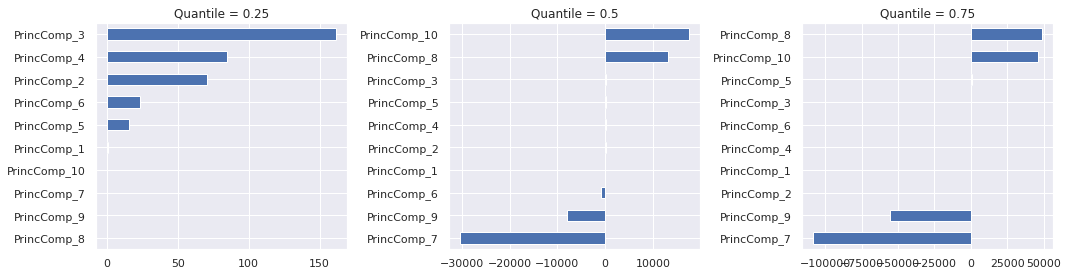

In [154]:
Qreg_coefs['coef_value'] = (Qreg_coefs['coef'] ) 
Qreg_coefs = Qreg_coefs.sort_values(by=['quantile','coef_value'])

fig = plt.figure(figsize=(15, 4))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    w = Qreg_coefs[Qreg_coefs['quantile']==quantiles[i]]
    w['coef'].plot.barh()
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

When predicting higher prices, the longitude, zip_codes and viiew will highly affect prices.

while in prediicting lower and medium prices of houses, prices will be more driven by sqft_living, sqft_lot and floors features

In [155]:
quantiles = [0.25,0.5,0.75]
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['PrincComp_1'],res.params['PrincComp_2'],res.params['PrincComp_3'],res.params['PrincComp_4'],res.params['PrincComp_5'],res.params['PrincComp_6'],res.params['PrincComp_7'],res.params['PrincComp_8'],res.params['PrincComp_9'] ,res.params['PrincComp_10'] ] + res.conf_int().loc['PrincComp_1'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept','PrincComp_1_coef','PrincComp_2_coef','PrincComp_3_coef','PrincComp_4_coef','PrincComp_5_coef','PrincComp_6_coef', 'PrincComp_7_ coef', 'PrincComp_8.coef', 'PrincComp_9_coef' ,'PrincComp_10_coef' ,'cf_lower_bound', 'cf_upper_bound'])


In [156]:
params

,qt,intercept,PrincComp_1_coef,PrincComp_2_coef,PrincComp_3_coef,PrincComp_4_coef,PrincComp_5_coef,PrincComp_6_coef,PrincComp_7_ coef,PrincComp_8.coef,PrincComp_9_coef,PrincComp_10_coef,cf_lower_bound,cf_upper_bound
0,0.25,415603.22,0.63,141.93,61.33,34.02,623.04,1047.82,-84070.61,56939.34,-61843.95,-10903.79,0.57,0.68
1,0.50,514530.45,0.70,168.48,87.62,45.35,634.92,1563.52,-101640.71,65133.53,-52244.04,-2446.23,0.65,0.76
2,0.75,625880.25,0.91,201.69,110.43,65.52,676.26,1900.30,-123797.75,85960.43,-52660.08,-11490.84,0.83,0.98


In [157]:
print("The mean squared error for the 25th regression:",metrics.mean_squared_error(y_test, Y_test_pred1))
print("The mean squared error for the 50th regression:",metrics.mean_squared_error(y_test, Y_test_pred2))
print("The mean squared error for the 75th regression:",metrics.mean_squared_error(y_test, Y_test_pred3))

The mean squared error for the 25th regression: 368498793260.69324
The mean squared error for the 50th regression: 363892882842.252
The mean squared error for the 75th regression: 404600242867.8059


The MSEs of the quantiles are higher than the base model and hence are better suited for carrying out prediction for low, medium and high prices for houses

## ***Ridge regression***

Ridge sums the squares of coefficient values (the L-2 norm) and multiplies it by some constant lambda. Compared to Lasso, this regularization term will decrease the values of coefficients, but is unable to force a coefficient to exactly 0.

In [158]:
drop=['id','price']
X = house_data.drop(drop, axis=1)
y = house_data['price']

In [159]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [160]:
search.fit(X,y)
abs(search.best_score_) 

41033295736.83143

In [161]:
search.best_params_

{'alpha': 0.01}

In [162]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
ridge_model = (mean_squared_error(y,y_pred=ridge.predict(X)))
print("The mean squared error for the ridge regression:",ridge_model)

The mean squared error for the ridge regression: 40642620048.74139


In [163]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,house_data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': -0.04818476436864864,
 'bedrooms': 92.38562391943252,
 'condition': 95.90069621059533,
 'floors': 55214.47931872483,
 'grade': 62.121752579380626,
 'id': -34285.91677195689,
 'price': 40720.227573021766,
 'sqft_above': -2576.690278281277,
 'sqft_basement': 19.35083680454448,
 'sqft_living': 5229.134367181908,
 'sqft_lot': 574535.8058352576,
 'view': 98643.23130334429,
 'waterfront': 25983.377139837474,
 'yr_built': -583.619689814008,
 'yr_renovated': 603210.0621153774,
 'zipcode': -204712.91963339335}

In [164]:
ridger2= metrics.r2_score(y,y_pred=ridge.predict(X))
print('R2 score for the ridge regression is {}'.format(ridger2) )

R2 score for the ridge regression is 0.6988292556182674


There is a 13% improvement of accuracy prediction from linear 57% to 70% hence ridge may be a better model than linear regression in predicting prices of houses

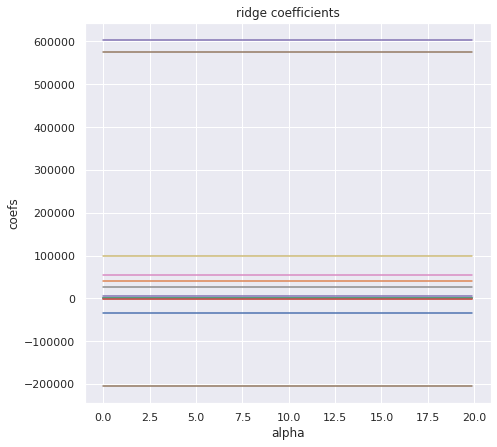

In [165]:
coefsridge = [] 

# Building ridge for 200 values of alpha and write the coefficients into array
# 
alphasridge = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = Ridge(alpha=alphasridge[i])
    lasso.fit(X, y)
    coefsridge.append(ridge.coef_) 

# Building ridge coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasridge, coefsridge)
plt.title('ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

## ***Lasso regression***

Lasso (sometimes stylized as LASSO or lasso) adds the sum of the coefficient values (the L-1 norm) multiplied by a constant lambda. This additional term penalizes the model for having coefficients that do not explain a sufficient amount of variance in the data. It also has a tendency to set the coefficients of the bad predictors mentioned above to 0. This makes Lasso useful in feature selection.

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import linear_model

# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
lm.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 22.0}
lasso score: 0.7092220657049901
lasso MSE: 41280833976.20473
lasso best estimator coef: [-3.67256099e+04  3.60673826e+04  2.95432535e+02 -3.00675791e-02
  9.28662983e+03  5.45885441e+05  5.42612639e+04  2.83583955e+04
  1.00726929e+05 -1.05602547e+02 -1.41638946e+02 -2.64450520e+03
  1.60796188e+01 -6.09674349e+02  6.06017756e+05 -2.07013797e+05]


There is a 1% improvement of the r score in the lasso from the ridge. The difference is not that significant though

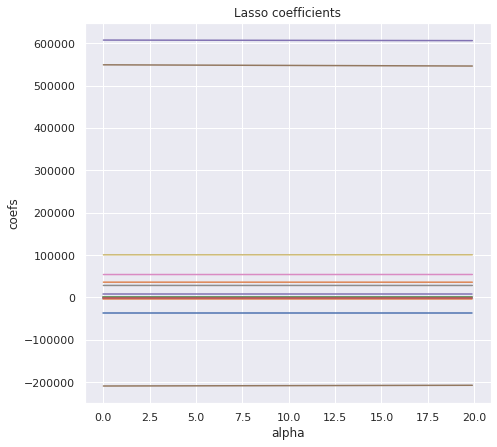

In [168]:
#  Visualization
#

coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

## ***Elastic Net Regression***

Elastic Net includes both L-1 and L-2 norm regularization terms. This gives us the benefits of both Lasso and Ridge regression. It has been found to have predictive power better than Lasso, while still performing feature selection. We therefore get the best of both worlds, performing feature selection of Lasso with the feature-group selection of Ridge.

In [169]:
from sklearn.linear_model import ElasticNet

In [171]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [172]:
search.fit(X,y)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
41065039944.16752


In [173]:
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)
elastic_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(elastic_model)

40725757557.36127


In [174]:
#Coeff from elastic net.
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
print(coef_dict_baseline)

{'bedrooms': -30550.77957922086, 'bathrooms': 40065.68023611014, 'sqft_living': 90.96112223800466, 'sqft_lot': -0.0337594452925395, 'floors': 6305.366896059209, 'waterfront': 560550.9462452598, 'view': 55974.95814823223, 'condition': 26795.02275574762, 'grade': 94651.42113038649, 'sqft_above': 93.97096591995408, 'sqft_basement': 62.74284398395557, 'yr_built': -2389.403739017564, 'yr_renovated': 22.059066505726552, 'zipcode': -526.2350364259443, 'lat': 589497.9653495615, 'long': -193870.8293279659}


The co-efficients show how many units the prices of the houses will rise or fall given a one unit increase of the independent variables

In [175]:
#R2 score from elastic net 
elasticr2= metrics.r2_score(y,y_pred=elastic.predict(X))
print('R2 score for the elastic net regression is {}'.format(elasticr2) )

R2 score for the elastic net regression is 0.6982131884127806


The r2 score of elastic net is almost the same to that of ridge and a bit worse off from lasso

In [176]:
#Trying to compare the MSE Of the various regressions except quatile regression 
#
#elastic_model, lasso_model, ridge_model, linearmodel MSES
x = (40725757557.36127,41280833976.20471,40642620048.74137,13939180229.833775)
max(x)

41280833976.20471

Lasso Regression was the best model according to MSE. The Lasso and Elastic Net models traded a significant amount of variance for bias, and we see that our error has decreased.The ridge regression model traded some variance for bias, which ultimately lead to an overall larger error.

According to the R_score Lasso was the best model for prediction

Using ridge and elastic net would not be a bad idea as they both have high r score and MSE are above the basemodel

## ***Follow up questions***

Other regression models would be performed to get the best Also more features such as availability of social anemities, security parameters would be added to increase r_score of the models

## **[Github Link](https://github.com/stephane-evrard/DataScience_Core_WK7.git)**